In [1]:
import sys
sys.path.append("../src/")
import warnings
warnings.filterwarnings("ignore")

from eddies_detection import  get_traj_with_parcels, get_traj_with_scipy, find_eddies
from plot_tools import StreamPlot

date = 0
stream_data_fname = "../data/data.nc"
runtime = 400   
delta_time = 5
particle_grid_step = 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

## Compute trajectories using parcels lib.

In [3]:
help(get_traj_with_parcels)

Help on function get_traj_with_parcels in module eddies_detection:

get_traj_with_parcels(date, runtime, delta_time, particle_grid_step, stream_data_fname)
    Compute trajectories of particles in the sea using parcels library.
    
    Compute trajectories of particles in the sea at a given date, in a static 2D
    field of stream. Trajectories are saved in a .nc file. 
    
    Args:
        date (int) : Day in number of days relatively to the data time origin at
            which the stream data should be taken.
        runtime (int) : Total duration in hours of the field integration.
            Trajectories length increases with the runtime.
        delta_time (int) : Time step in hours of the integration.
        particle_grid_step (int) : Grid step size for the initial positions of
            the particles. The unit is the data index step, ie data dx and dy.
        stream_data_fname (str) : Complete name of the stream data file.
    
    Returns:
        stream_line_list (list

INFO: Temporary output files are stored in out-NWHQOVQZ.
INFO: You can use "parcels_convert_npydir_to_netcdf out-NWHQOVQZ" to convert these to a NetCDF file during the run.
100% (1440000.0 of 1440000.0) |##########| Elapsed Time: 0:07:40 Time:  0:07:40


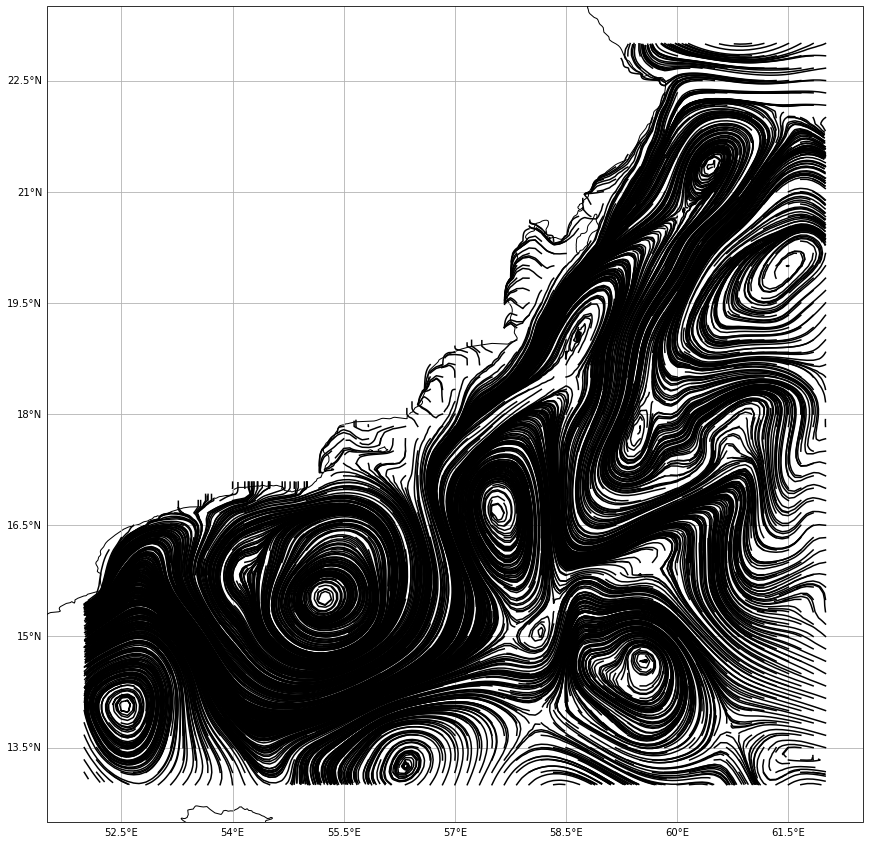

In [4]:
figure = StreamPlot()
a = get_traj_with_parcels(date, runtime, delta_time, particle_grid_step, stream_data_fname)
figure.plot_trajectories(a,line_style='k')
figure.show()

## Compute trajectories using scipy lib

5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 


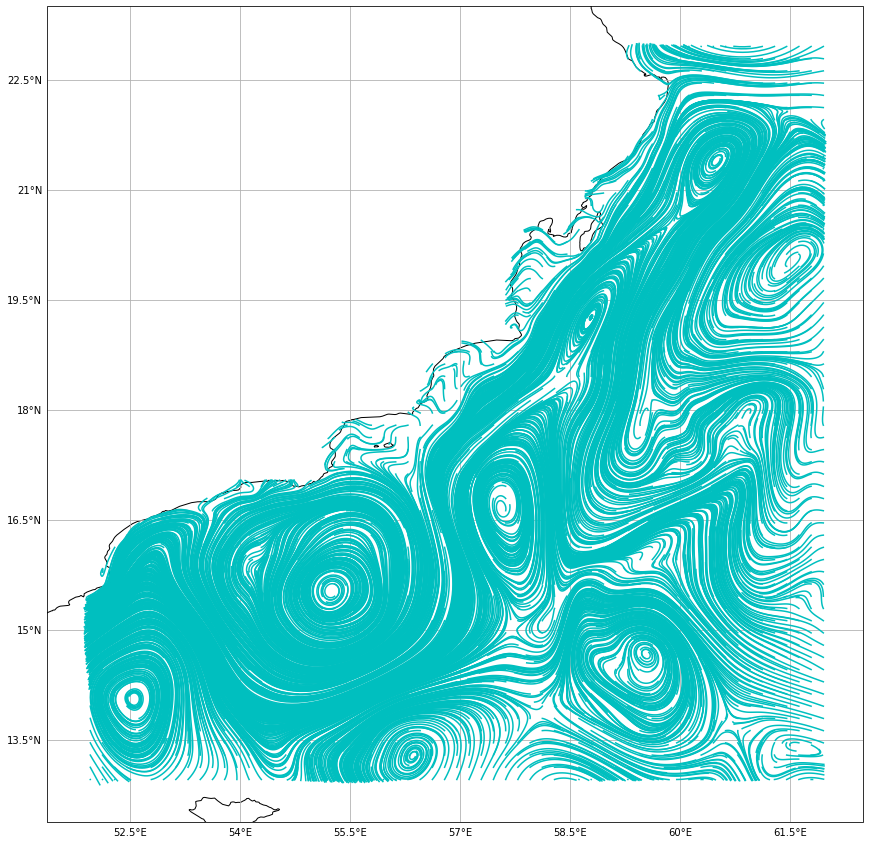

In [5]:
figure = StreamPlot()
b = get_traj_with_scipy(date, runtime, delta_time, particle_grid_step, stream_data_fname)
figure.plot_trajectories(b,line_style='c')
figure.show()

## Find eddies and display

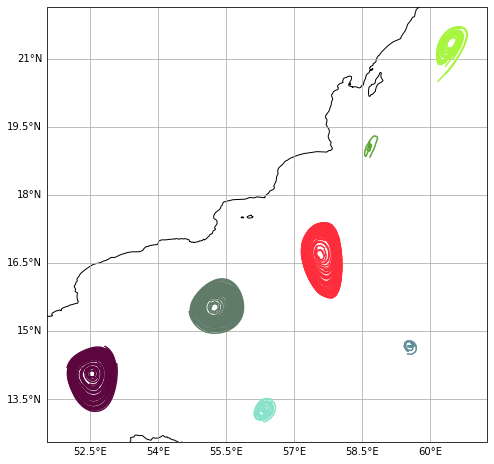

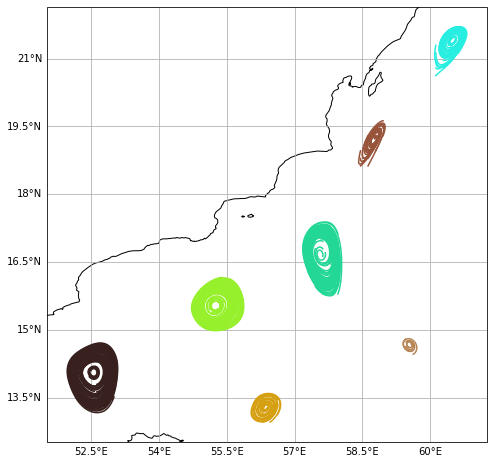

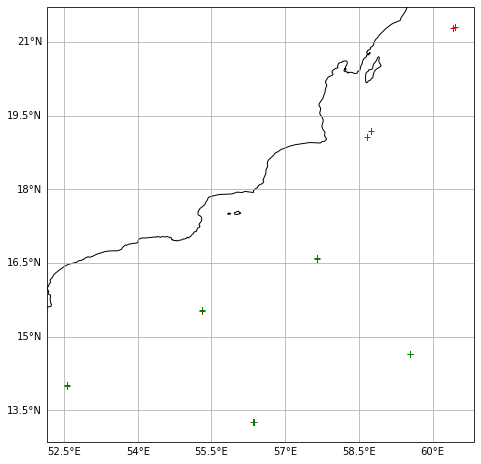

In [6]:
plt.rcParams['figure.figsize'] = [8, 8]

import random as rd
rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

figure = StreamPlot()
aa = find_eddies(a)
for eddy in aa:
    line_style = rd_color()
    figure.plot_trajectories(eddy.sl_list,line_style=line_style)
figure.show()

figure = StreamPlot()
bb = find_eddies(b)
for eddy in bb:
    line_style = rd_color()
    figure.plot_trajectories(eddy.sl_list,line_style=line_style)
figure.show()

figure = StreamPlot()
figure.plot_eddies(aa,line_style='r+')
figure.plot_eddies(bb,line_style='g+')

In [7]:
import os
os.system("find . -regextype posix-extended -regex './out-[A-Z]{8}' -exec rm -r {} +")

0